In [ ]:
import random
import math

tourist_locations = [
    "Jaipur", "Udaipur", "Jodhpur", "Pushkar", "Ajmer",
    "Ranthambore", "Mount Abu", "Bikaner", "Chittorgarh",
    "Alwar", "Kota", "Sawai Madhopur", "Bharatpur",
    "Shekhawati", "Jaisalmer", "Neemrana", "Mandawa",
    "Kumbhalgarh", "Sirohi", "Barmer"
]

distances = {
    ("Jaipur", "Udaipur"): 400,
    ("Jaipur", "Jodhpur"): 350,
    ("Jaipur", "Pushkar"): 150,
    ("Udaipur", "Jodhpur"): 260,
    ("Udaipur", "Pushkar"): 320,
    ("Jodhpur", "Pushkar"): 200,
    ("Jaipur", "Ajmer"): 135,
    ("Ajmer", "Pushkar"): 15,
    ("Ajmer", "Jodhpur"): 200,
    ("Jodhpur", "Bikaner"): 255,
    ("Bikaner", "Jaisalmer"): 335,
    ("Jaisalmer", "Jodhpur"): 290,
    ("Jaipur", "Ranthambore"): 160,
    ("Jaipur", "Alwar"): 160,
    ("Jaipur", "Sawai Madhopur"): 140,
    ("Jaipur", "Kota"): 240,
    ("Kota", "Bundi"): 35,
    ("Bundi", "Chittorgarh"): 180,
    ("Jaipur", "Bharatpur"): 190,
    ("Bharatpur", "Agra"): 55,
    # Add more distances here...
}

def tour_distance(tour):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distances.get((tour[i], tour[i+1]), 0)
    total_distance += distances.get((tour[-1], tour[0]), 0)
    return total_distance

def simulated_annealing(locations, distances, initial_temperature=1000, cooling_rate=0.95, num_iterations=1000):
    current_tour = locations.copy()
    current_distance = tour_distance(current_tour)
    best_tour = current_tour.copy()
    best_distance = current_distance

    temperature = initial_temperature

    for _ in range(num_iterations):
        random.shuffle(current_tour)
        new_distance = tour_distance(current_tour)
        delta_distance = new_distance - current_distance

        if delta_distance < 0 or random.random() < math.exp(-delta_distance / temperature):
            current_distance = new_distance
            if current_distance < best_distance:
                best_tour = current_tour.copy()
                best_distance = current_distance

        temperature *= cooling_rate

    return best_tour, best_distance
best_tour, best_distance = simulated_annealing(tourist_locations, distances)

print("Best tour:", best_tour)
print("Total distance:", best_distance)



Best tour: ['Bharatpur', 'Chittorgarh', 'Shekhawati', 'Bikaner', 'Barmer', 'Kota', 'Udaipur', 'Mandawa', 'Jaipur', 'Jaisalmer', 'Ajmer', 'Neemrana', 'Sawai Madhopur', 'Jodhpur', 'Alwar', 'Ranthambore', 'Kumbhalgarh', 'Sirohi', 'Pushkar', 'Mount Abu']
Total distance: 0


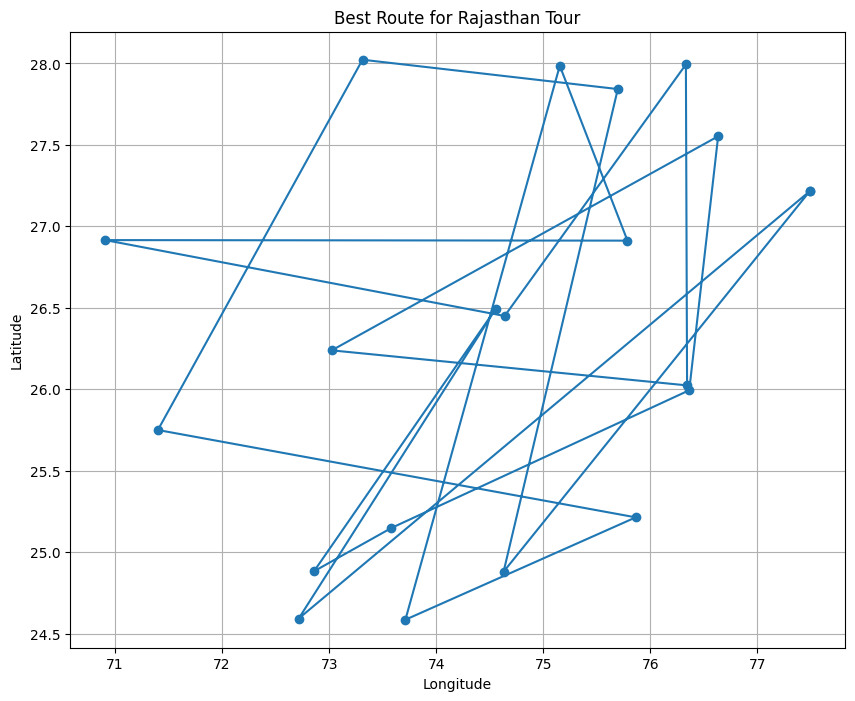

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the best route
def plot_route(locations, best_tour):
    # Get coordinates for each location (dummy data for illustration)
    coordinates = {
        "Jaipur": (26.9124, 75.7873),
        "Udaipur": (24.5854, 73.7125),
        "Jodhpur": (26.2389, 73.0243),
        "Pushkar": (26.4920, 74.5548),
        "Ajmer": (26.4499, 74.6399),
        "Ranthambore": (25.9940, 76.3645),
        "Mount Abu": (24.5925, 72.7156),
        "Bikaner": (28.0229, 73.3119),
        "Chittorgarh": (24.8799, 74.6299),
        "Alwar": (27.5530, 76.6346),
        "Kota": (25.2138, 75.8648),
        "Sawai Madhopur": (26.0238, 76.3443),
        "Bharatpur": (27.2161, 77.4910),
        "Shekhawati": (27.8428, 75.6972),
        "Jaisalmer": (26.9157, 70.9083),
        "Neemrana": (27.9938, 76.3333),
        "Mandawa": (27.9857, 75.1550),
        "Kumbhalgarh": (25.1489, 73.5827),
        "Sirohi": (24.8826, 72.8584),
        "Barmer": (25.7500, 71.4000)
    }

    # Extract coordinates for locations in the best tour
    route_coords = [coordinates[loc] for loc in best_tour]
    route_coords.append(route_coords[0])  # Close the loop

    # Unzip coordinates into separate lists for latitude and longitude
    lats, lons = zip(*route_coords)

    # Plot the route
    plt.figure(figsize=(10, 8))
    plt.plot(lons, lats, marker='o', linestyle='-')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Best Route for Rajasthan Tour')
    plt.grid(True)
    plt.show()

# Plot the best route
plot_route(tourist_locations, best_tour)
